# Importing the packages

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Loading the images

In [ ]:
# Load the MNIST dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
def invert_images(images):
    """
    Inverts the colors of the images (black background for white and white numbers for black).
    """
    return 255 - images  # Invert the pixels values (0 → 255, 255 → 0)

In [ ]:
x_train = invert_images(x_train)
x_test = invert_images(x_test)

# See the images

In [ ]:
def show_images(dataset, num_images=10):
  plt.figure(figsize=(10, 5))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(x_train[i], cmap='gray')
      plt.title(f'Label: {y_train[i]}')
      plt.axis('off') 
  plt.tight_layout()
  plt.show()


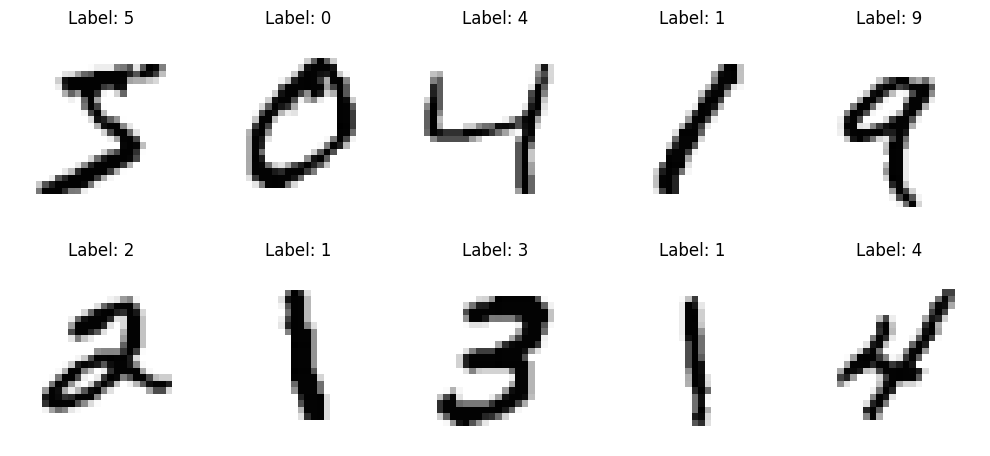

In [ ]:
show_images(x_train)

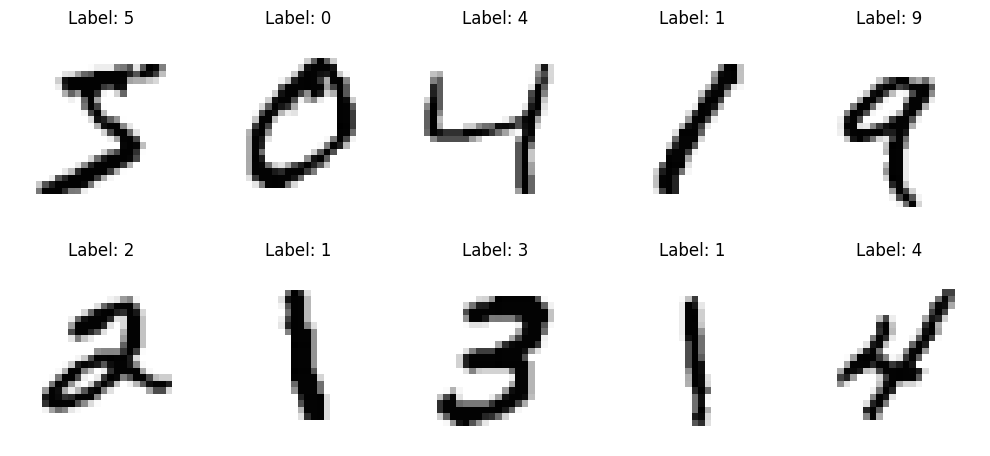

In [ ]:
show_images(x_test)

# Resize images to add color channel (1 channel for grayscale)

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values for range [0, 1]

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# CNN Model

In [ ]:
model = models.Sequential([
    # First layer convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second layer convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third layer convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Totally connect layer (Denser layer)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes output (0 to 9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the modelo

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer with a personalized learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Increase quantity of data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the data augmentation object
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation up to 10 degrees
    zoom_range=0.1,         # Random zoom up to 10%
    width_shift_range=0.1,  # Random horizontal displacement of up to 10%
    height_shift_range=0.1, # Random vertical displacement of up to 10%
    horizontal_flip=True    # Random horizontal inversion
)

# Apply data increase to the training set
datagen.fit(x_train)

# Train the model

In [15]:
epochs = 50
batch_size = 64
validation_split = 0.2
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.5855 - loss: 1.3981 - val_accuracy: 0.9283 - val_loss: 0.2448
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 55ms/step - accuracy: 0.9357 - loss: 0.2289 - val_accuracy: 0.9578 - val_loss: 0.1496
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9571 - loss: 0.1475 - val_accuracy: 0.9656 - val_loss: 0.1174
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9656 - loss: 0.1111 - val_accuracy: 0.9716 - val_loss: 0.0930
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9742 - loss: 0.0885 - val_accuracy: 0.9748 - val_loss: 0.0828
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9769 - loss: 0.0765 - val_accuracy: 0.9797 - val_loss: 0.0710
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 57ms/step - accuracy: 0.9786 - loss: 0.0703 - val_accuracy: 0.9811 - val_loss: 0.0663
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9818 - loss: 0.0615 - 

# Save the model

In [ ]:
model.save('cnn_model.h5')

# Evaluate the model in the test set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy in the test set: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9862 - loss: 0.0518
Acurácia no conjunto de teste: 0.9893


# Visualizing accuracy and loss during training

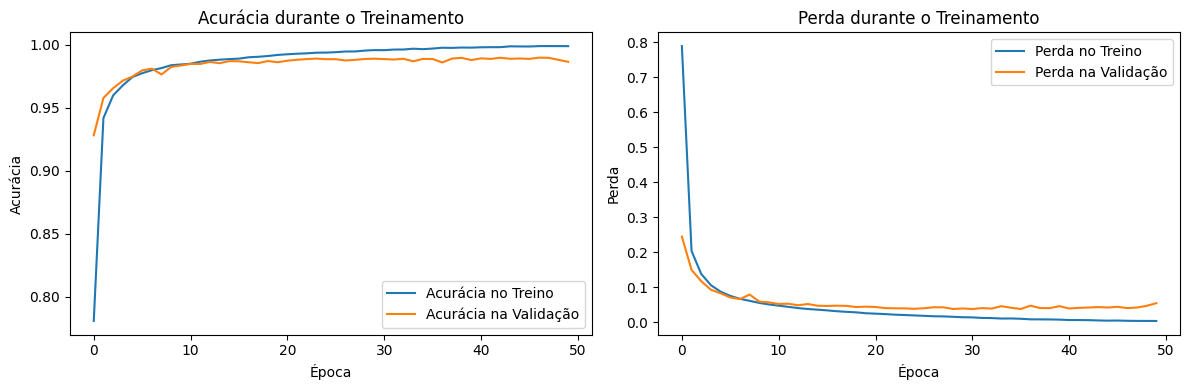

In [ ]:
plt.figure(figsize=(12, 4))

# Gráfico da acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy in Training')
plt.plot(history.history['val_accuracy'], label='Accuracy in Validation')
plt.title('Accuracy during the Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico da perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss in training')
plt.plot(history.history['val_loss'], label='Loss in Validation')
plt.title('Loss during the Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()